In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
from scipy.stats import poisson
import seaborn as sns

import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/scripts/novae_plots_nb.mplstyle')

In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [15]:
np.random.poisson(lam=[1., 2., 3.], size=(10,3))

array([[0, 1, 3],
       [2, 0, 3],
       [4, 5, 3],
       [1, 0, 4],
       [1, 0, 7],
       [0, 4, 3],
       [0, 2, 6],
       [0, 5, 4],
       [0, 2, 2],
       [1, 4, 1]])

In [25]:
n_trial = 5000
sig_lams = np.linspace(1., 5., 41)
needed_flux = []
bg_lams = np.append(
    np.append(np.logspace(-5., -1., 5), 
              np.linspace(.2, 1., 9)), 
    np.linspace(1.5, 4., 6))
bg = np.random.poisson(lam=bg_lams, size=(n_trial, bg_lams.size))
median = np.median(bg, axis=0)
sig_fracs = []; sigs = []
sig = np.random.poisson(lam=sig_lams, size=(n_trial, sig_lams.size))
total = bg[:,np.newaxis] + sig[:,:,np.newaxis]

In [30]:
median.shape

(20,)

In [33]:
total[total > median]

(3663198,)

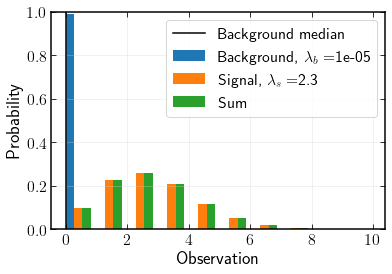

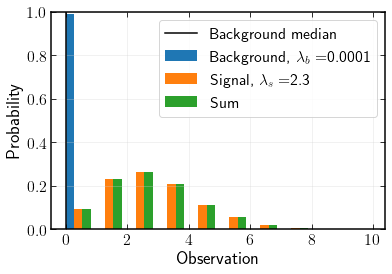

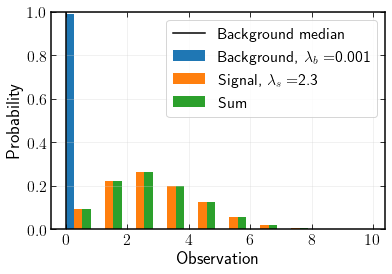

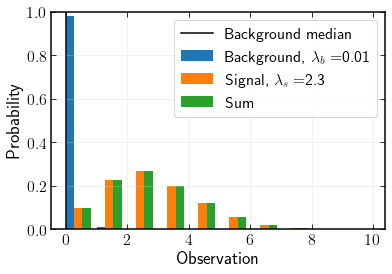

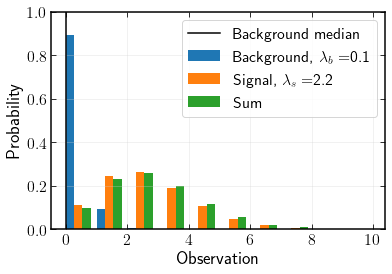

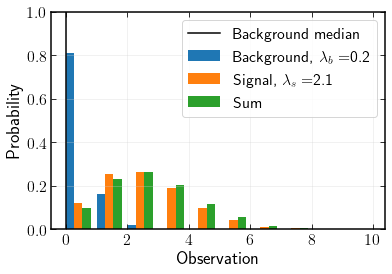

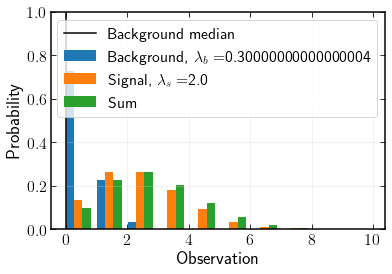

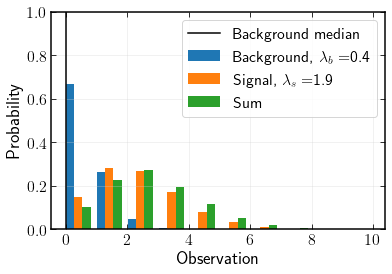

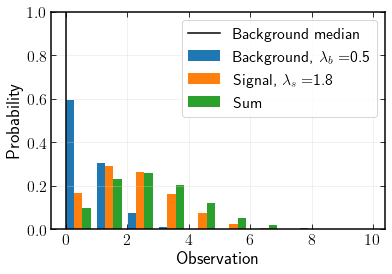

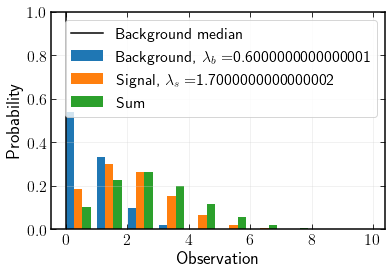

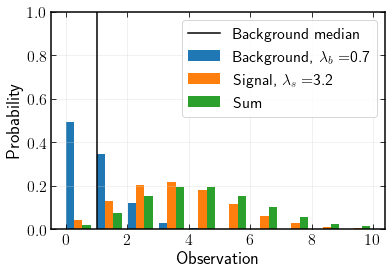

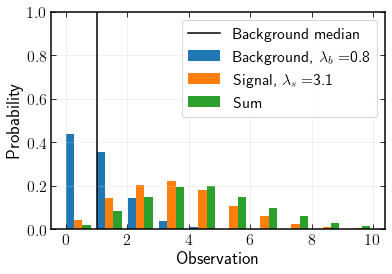

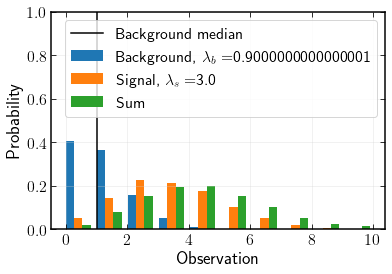

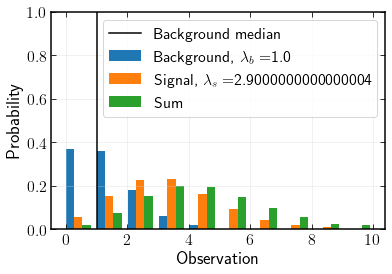

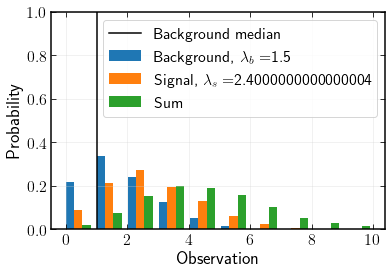

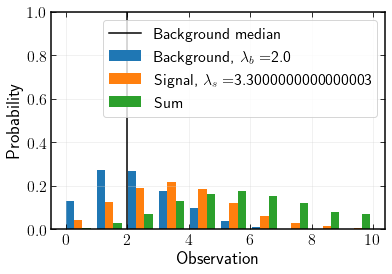

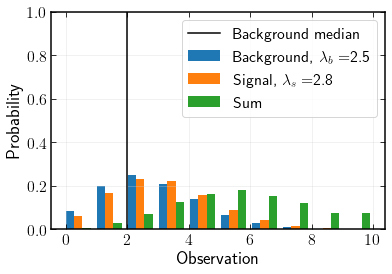

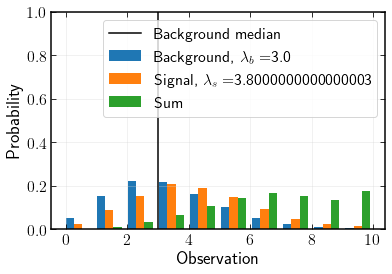

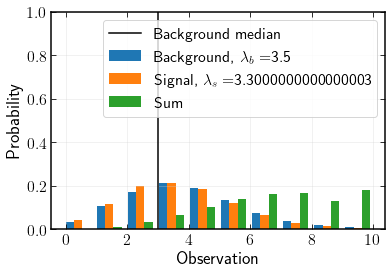

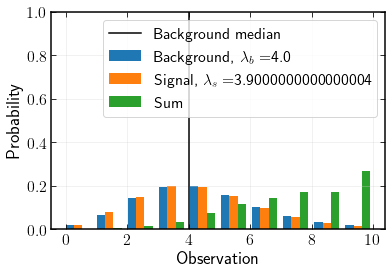

In [6]:
sig_lams = np.linspace(1., 5., 41)
needed_flux = []
bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(median, c = 'k', label = 'Background median')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()

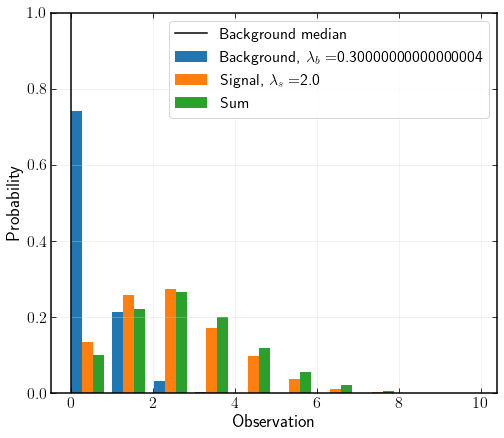

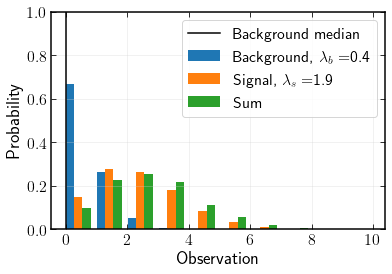

In [7]:
fig, ax = plt.subplots(figsize = (8, 7))

sig_lams = np.linspace(1., 5., 41)
needed_flux = []
bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))
for bg_lam in bg_lams[6:8]:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(median, c = 'k', label = 'Background median')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()

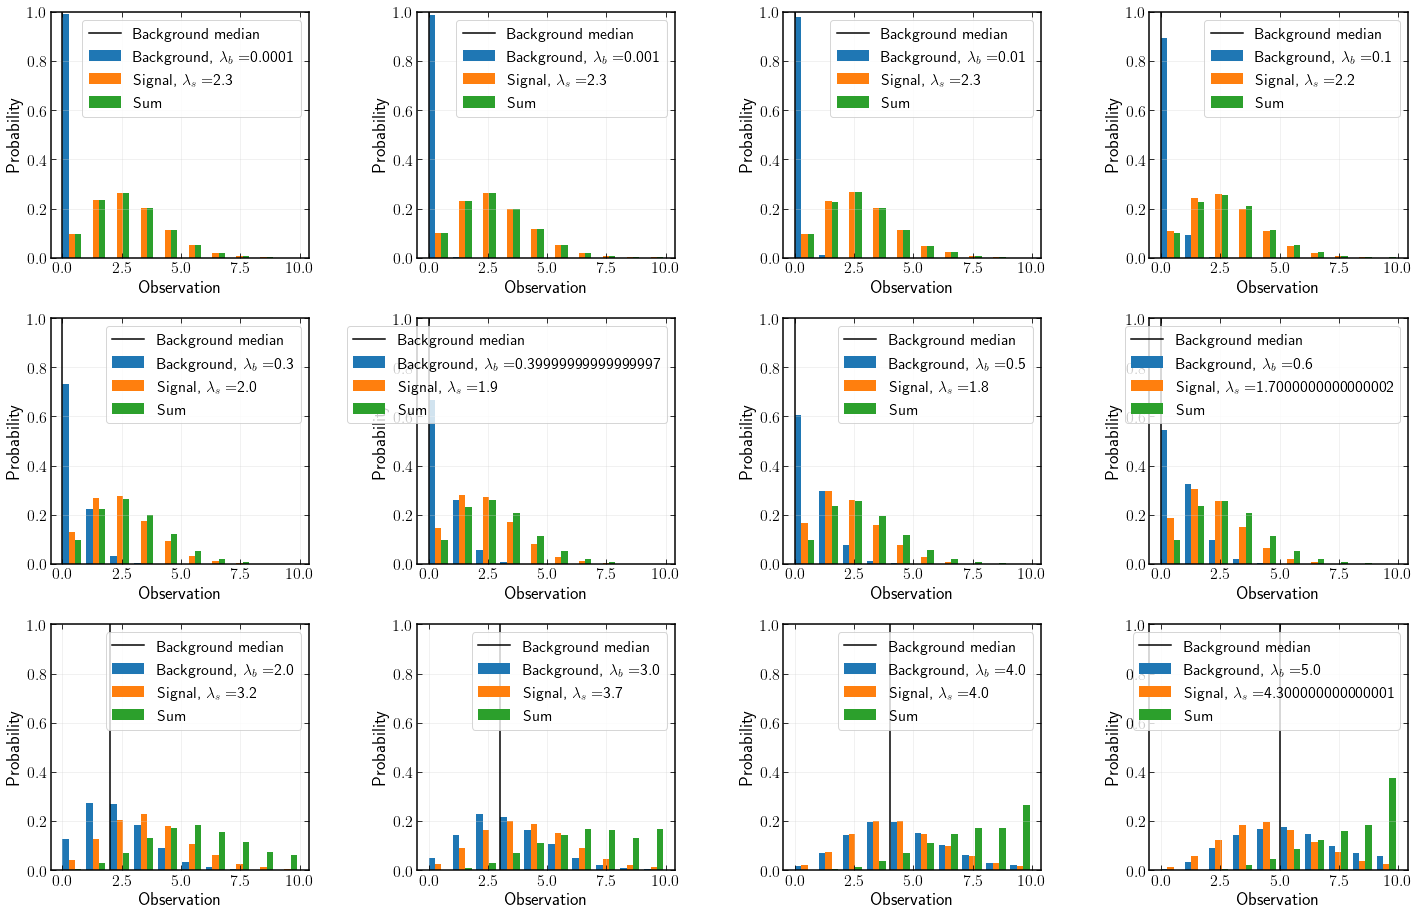

In [8]:
fig, ax = plt.subplots(3,4, figsize = (20, 13))

counter = 1
sig_lams = np.linspace(1., 5., 41)
needed_flux = []
bg_lams = np.append(np.append(np.logspace(-4., -1., 4), np.linspace(.3, .6, 4)), np.linspace(2, 5., 4))
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux.append(sig_lams[ii])
    
    plt.subplot(3,4,counter)
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(median, c = 'k', label = 'Background median')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    counter += 1
    
plt.tight_layout()    
    

In [34]:
sig_lams = np.linspace(0., 25., 300)
needed_flux = []; needed_dp_50_flux = []; needed_dp_90_flux = []
bg_lams = np.append(np.logspace(-5., -1., 35), np.linspace(.2, 10, 80))
bg_meds = []
sens_analytical = []
sig_max = 50

for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=30000)
    median = np.median(bg)
    three_sigma = np.percentile(bg, 99.865)
    sig_fracs = []
    dp_fracs = []
    sigs = []
    for sig_lam in sig_lams:
        sig = np.random.poisson(lam=sig_lam, size=30000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        dp_frac = len(total[total > three_sigma]) / float(len(total))
        sig_fracs.append(frac)
        dp_fracs.append(dp_frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    jj = find_nearest(dp_fracs, 0.5)
    kk = find_nearest(dp_fracs, 0.9)
    needed_flux.append(sig_lams[ii])
    bg_meds.append(median)
    needed_dp_50_flux.append(sig_lams[jj])
    needed_dp_90_flux.append(sig_lams[kk])
    
    xvals = np.linspace(0., sig_max, sig_max + 1)
    fine_x_vals = np.linspace(0., sig_max, sig_max * 10.)
    median = np.min(np.argwhere(poisson.cdf(xvals, bg_lam) > 0.5))
    fact_val = 1. / 10.
    test_strengths = sp.special.gammaincc(median + 1, fine_x_vals)
    ind = find_nearest(test_strengths, fact_val)
    sens_analytical.append(fine_x_vals[ind] - bg_lam)

/home/apizzuto/.venvs/py3_realtime/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


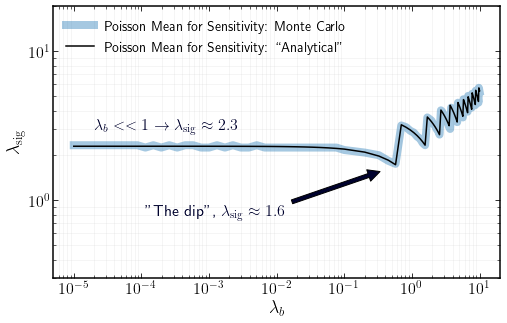

In [47]:
fig, ax = plt.subplots(figsize = (8,5))
fig.set_facecolor('w')

plt.plot(bg_lams, needed_flux, lw=8., label='Poisson Mean for Sensitivity: Monte Carlo', alpha = 0.4)
plt.plot(bg_lams, sens_analytical, c = 'k', label= 'Poisson Mean for Sensitivity: ``Analytical"')
#plt.plot(bg_lams, bg_meds, lw=5., label='Background Median', ls = '-.')
# plt.plot(bg_lams, needed_dp_50_flux, lw=4., c = sns.xkcd_rgb['aqua green'], 
#          label = r'50\% CL 3$\sigma$ discovery', zorder=1)
# plt.plot(bg_lams, needed_dp_90_flux, lw=4., c = sns.xkcd_rgb['forest green'], 
#          label = r'90\% CL 3$\sigma$ discovery', zorder=1)
plt.text(2e-5, 3., r'$\lambda_b << 1 \rightarrow \lambda_{\mathrm{sig}}\approx 2.3$',
        color=sns.xkcd_rgb['dark navy blue'])
ax.annotate(r'"The dip", $\lambda_{\mathrm{sig}}\approx 1.6$',
            color=sns.xkcd_rgb['dark navy blue'],
            xy=(0.4, 1.6), xycoords='data',
            xytext=(-1e2, -5e1), textcoords='offset points',
            arrowprops=dict(facecolor=sns.xkcd_rgb['dark navy blue'], shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

plt.xscale('log')
plt.yscale('log')
plt.ylim(3e-1, 2e1)
plt.legend(loc=2, fontsize=14, frameon=False)
plt.xlabel(r'$\lambda_{b}$', fontsize = 18)
plt.ylabel(r'$\lambda_{\mathrm{sig}}$', fontsize = 18)
plt.grid(which = 'both', alpha = 0.3)
# plt.savefig('/home/apizzuto/public_html/FastResponse/update/toy_MC_discovery_confidence_levels.png',
#            dpi=200, bbox_inches='tight')
plt.show()

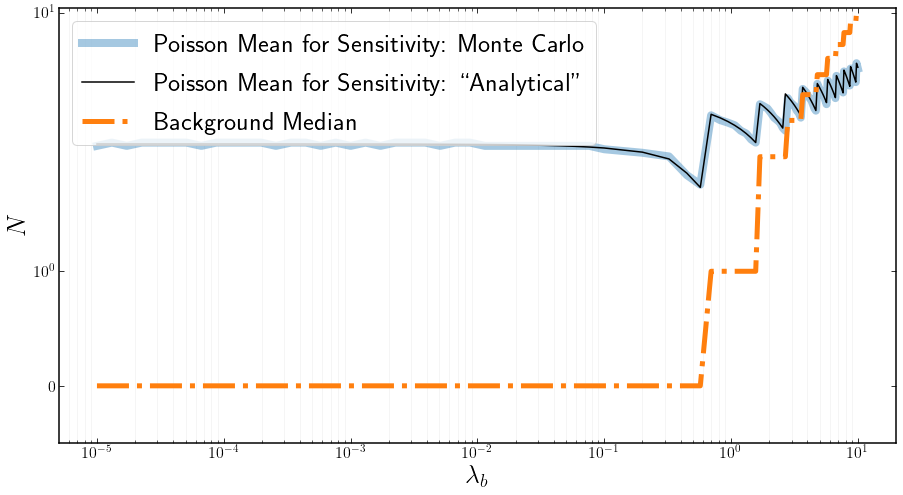

In [11]:
fig, ax = plt.subplots(figsize = (15,8))
fig.set_facecolor('w')

plt.plot(bg_lams, needed_flux, lw=8., label='Poisson Mean for Sensitivity: Monte Carlo', alpha = 0.4)
plt.plot(bg_lams, sens_analytical, c = 'k', label= 'Poisson Mean for Sensitivity: ``Analytical"')
plt.plot(bg_lams, bg_meds, lw=5., label='Background Median', ls = '-.')
#plt.plot(bg_lams, needed_dp_50_flux, lw=4., c = sns.xkcd_rgb['light moss green'], label = r'50\% CL 3$\sigma$ discovery')
#plt.plot(bg_lams, needed_dp_90_flux, lw=4., c = sns.xkcd_rgb['forest green'], label = r'90\% CL 3$\sigma$ discovery')
plt.xscale('log')
plt.yscale('symlog')
plt.legend(loc=2, fontsize=26)
plt.xlabel(r'$\lambda_{b}$', fontsize = 26)
plt.ylabel(r'$N$', fontsize = 26)
plt.grid(which = 'both', alpha = 0.3)
plt.show()

In [12]:
sig_lams = np.logspace(0.2, 3., 100)
bg_lams_large = np.logspace(1., 3., 50)
bg_meds_large = []
needed_flux_large = []
sens_analytical_large = []
sig_max = 5000

for bg_lam in bg_lams_large:
    bg = np.random.poisson(lam=bg_lam, size=30000)
    median = np.median(bg)
    sig_fracs = []
    sigs = []
    for sig_lam in sig_lams:
        sig = np.random.poisson(lam=sig_lam, size=30000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
        sigs.append(sig)
    ii = find_nearest(sig_fracs, 0.9)
    sig = sigs[ii]
    total = bg + sig
    needed_flux_large.append(sig_lams[ii])
    bg_meds_large.append(median)
    
    xvals = np.linspace(0., sig_max, sig_max + 1)
    fine_x_vals = np.linspace(0., sig_max, sig_max * 2)
    median = np.min(np.argwhere(poisson.cdf(xvals, bg_lam) > 0.5))
    fact_val = 1. / 10.
    test_strengths = sp.special.gammaincc(median + 1, fine_x_vals)
    ind = find_nearest(test_strengths, fact_val)
    sens_analytical_large.append(fine_x_vals[ind] - bg_lam)

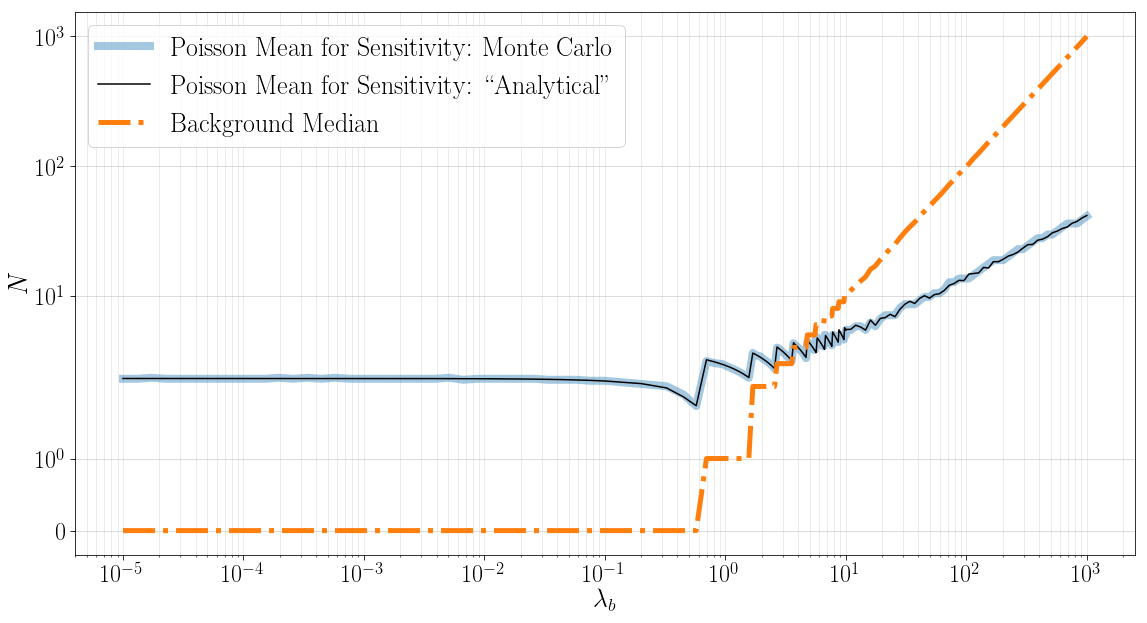

In [14]:
fig, ax = plt.subplots(figsize = (19,10))

plt.plot(np.append(bg_lams, bg_lams_large), np.append(needed_flux, needed_flux_large),
        lw=8., label='Poisson Mean for Sensitivity: Monte Carlo', alpha = 0.4)
plt.plot(np.append(bg_lams, bg_lams_large), np.append(sens_analytical, sens_analytical_large), 
         c = 'k', label= 'Poisson Mean for Sensitivity: ``Analytical"')
plt.plot(np.append(bg_lams, bg_lams_large), np.append(bg_meds, bg_meds_large),
        lw=5., label='Background Median', ls = '-.')
#plt.plot(np.logspace(-5, 3, 100), np.logspace(-5, 3, 100), 
#         label = 'Background Mean', lw = 3.5, c = 'm', ls = ':')
plt.xscale('log')
plt.yscale('symlog')
plt.legend(loc=2, fontsize=26)
plt.xlabel(r'$\lambda_{b}$', fontsize = 26)
plt.ylabel(r'$N$', fontsize = 26)
plt.grid(which = 'both', alpha = 0.3)
plt.show()

# Repeating with comparing to background mean, not median

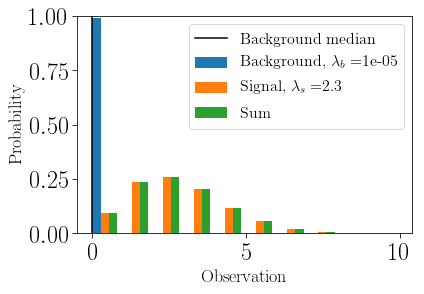

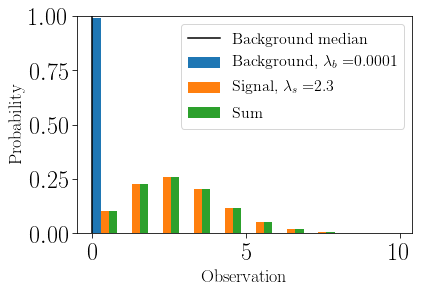

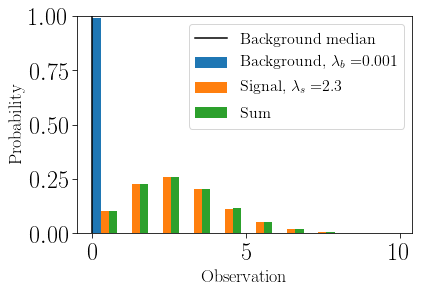

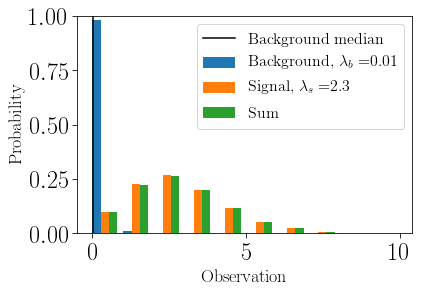

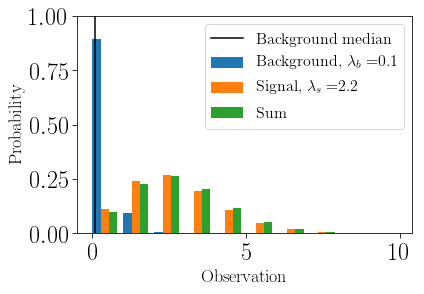

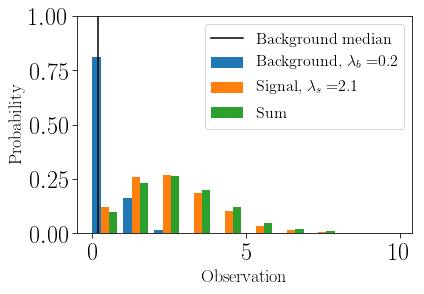

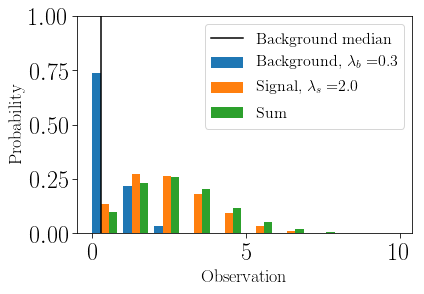

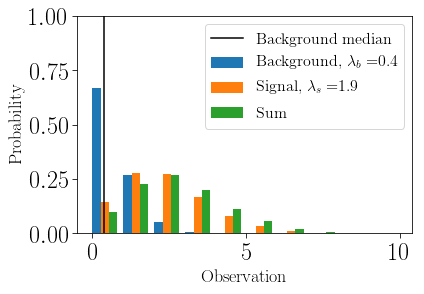

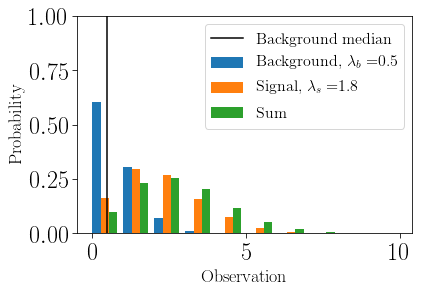

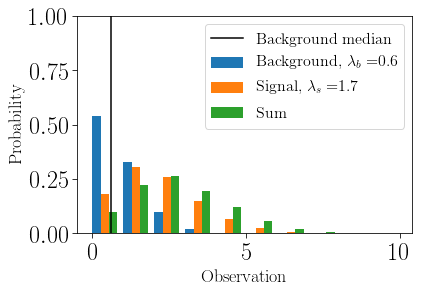

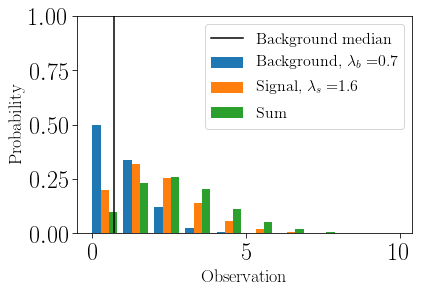

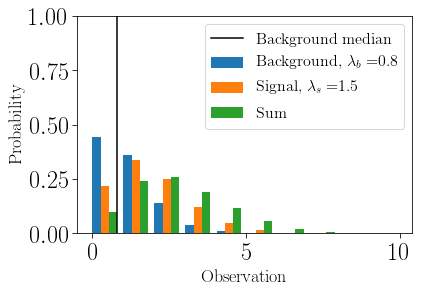

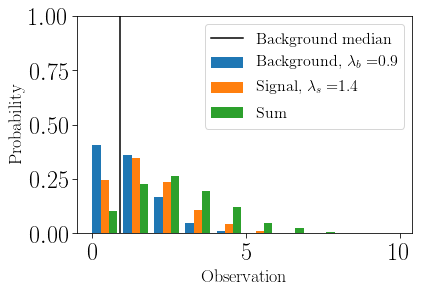

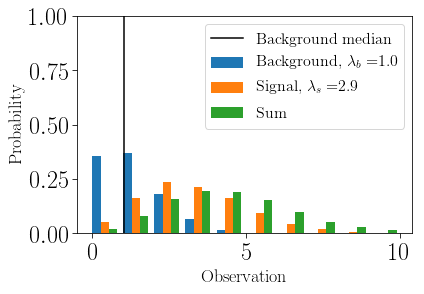

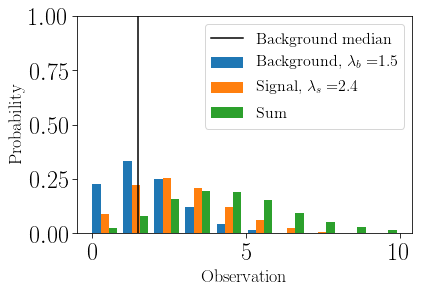

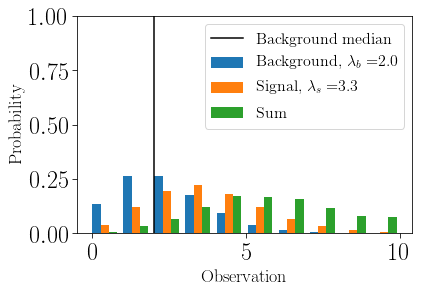

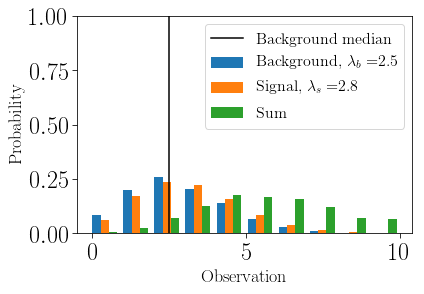

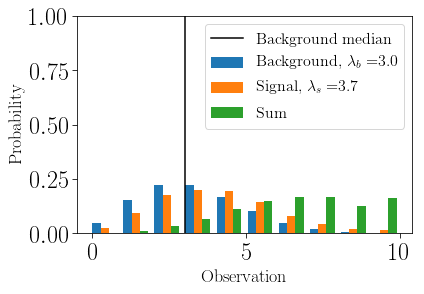

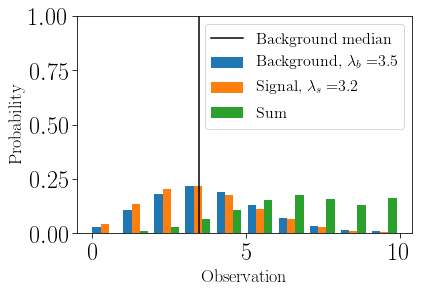

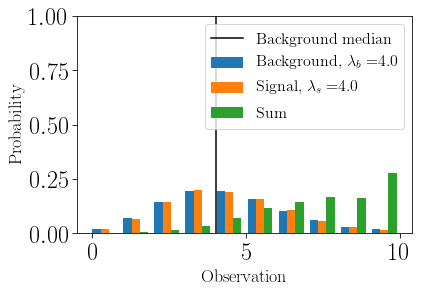

In [6]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

sig_lams = np.linspace(1., 5., 41)
needed_flux_mean = []
bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    mean = np.mean(bg)
    sig_fracs_mean = []
    sigs_mean = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > mean]) / float(len(total))
        sig_fracs_mean.append(frac)
        sigs_mean.append(sig)
    ii = find_nearest(sig_fracs_mean, 0.9)
    sig = sigs_mean[ii]
    total = bg + sig
    needed_flux_mean.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(mean, c = 'k', label = 'Background Mean')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()

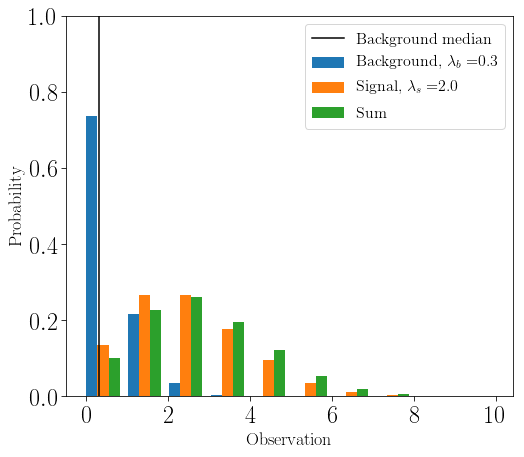

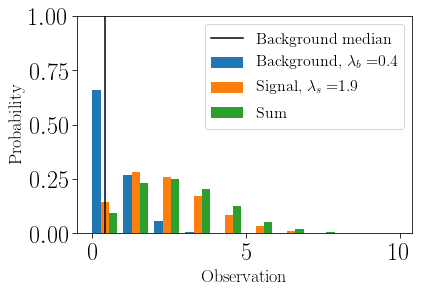

In [7]:
fig, ax = plt.subplots(figsize = (8, 7))
sig_lams = np.linspace(1., 5., 41)
needed_flux_mean = []
bg_lams = np.append(np.append(np.logspace(-5., -1., 5), np.linspace(.2, 1., 9)), np.linspace(1.5, 4., 6))
for bg_lam in bg_lams[6:8]:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    mean = np.mean(bg)
    sig_fracs_mean = []
    sigs_mean = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > mean]) / float(len(total))
        sig_fracs_mean.append(frac)
        sigs_mean.append(sig)
    ii = find_nearest(sig_fracs_mean, 0.9)
    sig = sigs_mean[ii]
    total = bg + sig
    needed_flux_mean.append(sig_lams[ii])
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(mean, c = 'k', label = 'Background Mean')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    plt.show()


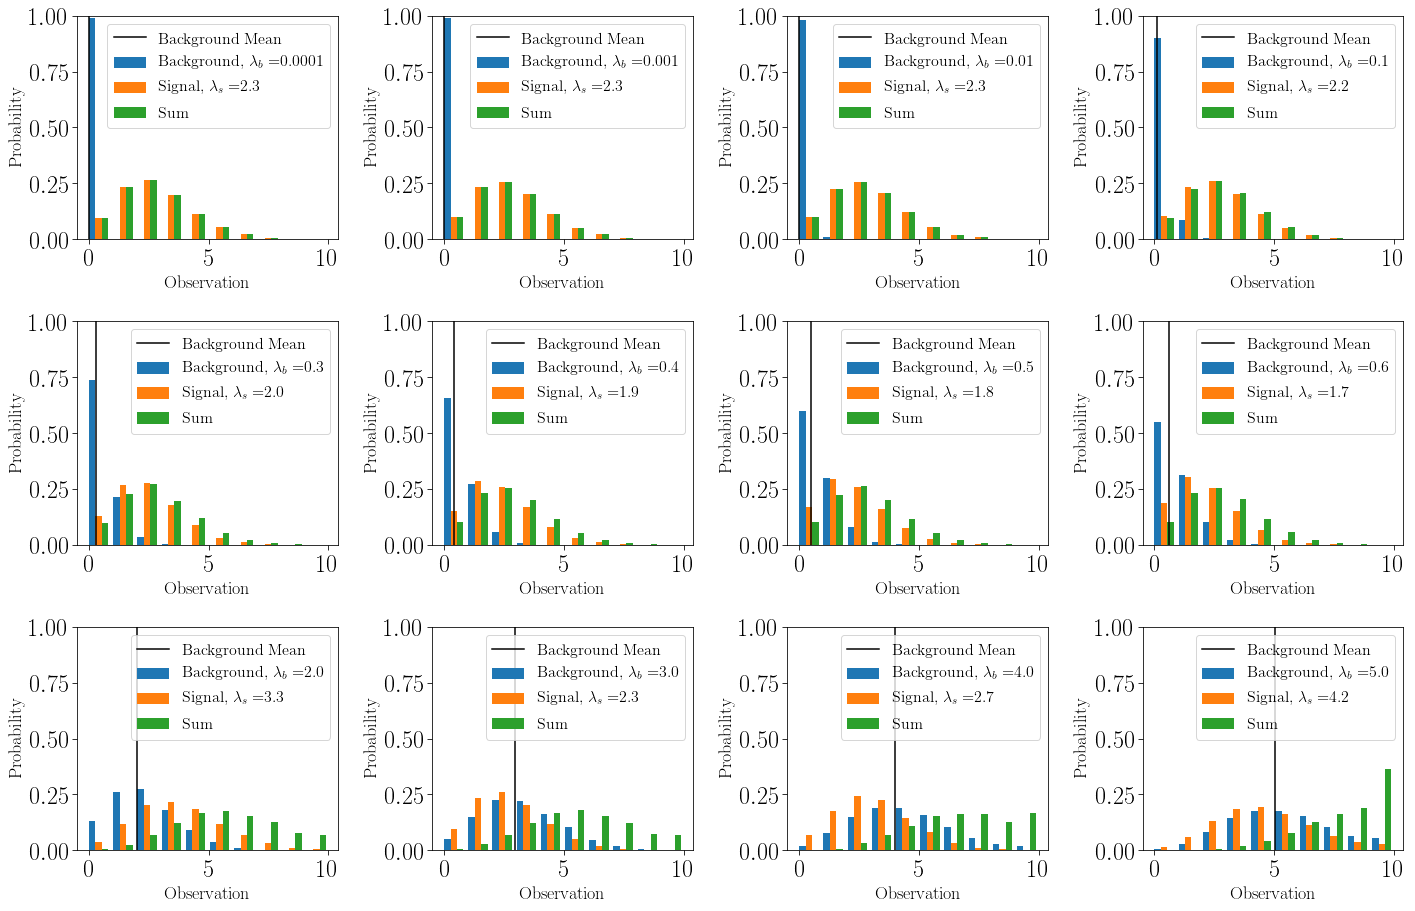

In [10]:
fig, ax = plt.subplots(3,4, figsize = (20, 13))

counter = 1
sig_lams = np.linspace(1., 5., 41)
needed_flux_mean = []
bg_lams = np.append(np.append(np.logspace(-4., -1., 4), np.linspace(.3, .6, 4)), np.linspace(2, 5., 4))
for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=10000)
    mean = np.mean(bg)
    sig_fracs_mean = []
    sigs_mean = []
    for sig_lam in np.linspace(1., 5., 41):
        sig = np.random.poisson(lam=sig_lam, size=10000)
        total = bg + sig
        frac = len(total[total > mean]) / float(len(total))
        sig_fracs_mean.append(frac)
        sigs_mean.append(sig)
    ii = find_nearest(sig_fracs_mean, 0.9)
    sig = sigs_mean[ii]
    total = bg + sig
    needed_flux_mean.append(sig_lams[ii])
    
    plt.subplot(3,4,counter)
    plt.hist([bg, sig, total], bins = np.linspace(-0.1, 10., 11), lw = 3., 
             label = [r'Background, $\lambda_b =${}'.format(bg_lam), r'Signal, $\lambda_s=${}'.format(sig_lams[ii]),'Sum'],
                      density = True)
    
    plt.axvline(mean, c = 'k', label = 'Background Mean')
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('Observation')
    plt.ylabel('Probability')
    #plt.text(4, 0.5, "Frac Total > median: {:.2f}".format(sig_fracs[ii]), fontsize = 14)
    plt.ylim(0., 1.)
    
    counter += 1
    
plt.tight_layout()    
    

In [7]:
sig_lams = np.linspace(1., 5., 100)
needed_flux = []
needed_flux_mean = []
bg_lams = np.append(np.logspace(-5., -1., 35), np.linspace(.2, 10, 80))
bg_meds = []
bg_means = []
sens_analytical = []
sig_max = 50

for bg_lam in bg_lams:
    bg = np.random.poisson(lam=bg_lam, size=30000)
    median = np.median(bg)
    sig_fracs = []
    for sig_lam in sig_lams:
        sig = np.random.poisson(lam=sig_lam, size=30000)
        total = bg + sig
        frac = len(total[total > median]) / float(len(total))
        sig_fracs.append(frac)
    ii = find_nearest(sig_fracs, 0.9)
    needed_flux.append(sig_lams[ii])
    bg_meds.append(median)
    
    mean = np.mean(bg)
    sig_fracs_mean = []
    for sig_lam in sig_lams:
        sig = np.random.poisson(lam=sig_lam, size=30000)
        total = bg + sig
        frac = len(total[total > mean]) / float(len(total))
        sig_fracs_mean.append(frac)
    ii = find_nearest(sig_fracs_mean, 0.9)
    needed_flux_mean.append(sig_lams[ii])
    bg_means.append(bg_means)
    
    
    xvals = np.linspace(0., sig_max, sig_max + 1)
    fine_x_vals = np.linspace(0., sig_max, sig_max * 10.)
    median = np.min(np.argwhere(poisson.cdf(xvals, bg_lam) > 0.5))
    fact_val = 1. / 10.
    test_strengths = sp.special.gammaincc(median + 1, fine_x_vals)
    ind = find_nearest(test_strengths, fact_val)
    sens_analytical.append(fine_x_vals[ind] - bg_lam)

/home/apizzuto/.venvs/analysis/lib/python2.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


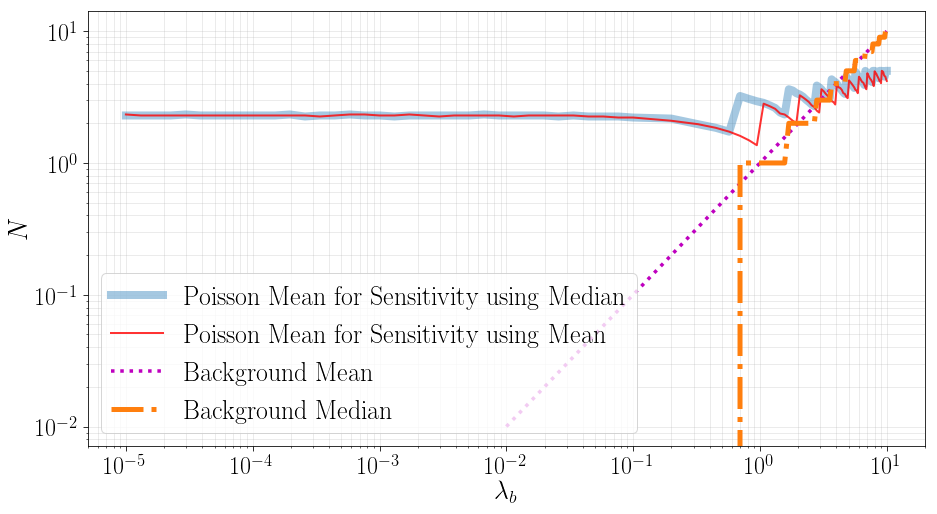

In [8]:
fig, ax = plt.subplots(figsize = (15,8))
fig.set_facecolor('w')

plt.plot(bg_lams, needed_flux, lw=8., label='Poisson Mean for Sensitivity using Median', alpha = 0.4)
plt.plot(bg_lams, needed_flux_mean, lw=2., label='Poisson Mean for Sensitivity using Mean', alpha = 0.8, c = 'r')
#plt.plot(bg_lams, sens_analytical, c = 'k', label= 'Poisson Mean for Sensitivity: ``Analytical"')
plt.plot(np.logspace(-2, 1, 100), np.logspace(-2, 1, 100), 
         label = 'Background Mean', lw = 3.5, c = 'm', ls = ':')
plt.plot(bg_lams, bg_meds, lw=5., label='Background Median', ls = '-.')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=3, fontsize=26)
plt.xlabel(r'$\lambda_{b}$', fontsize = 26)
plt.ylabel(r'$N$', fontsize = 26)
plt.grid(which = 'both', alpha = 0.3)
plt.show()

In [3]:
import numpy as np

In [5]:
import scipy as sp

Object `sp.lgamma` not found.
